In [159]:
#@title Imports for Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [160]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,id,timestamp,day_of_week,month,day,year,time,datetime,hour,timezone,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,Friday,November,30,2018,22:13,2018-11-30 22:13:01,22,America/New_York,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,Thursday,December,13,2018,10:50,2018-12-13 10:50:11,10,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,Thursday,December,13,2018,19:15,2018-12-13 19:15:03,19,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,Sunday,December,16,2018,23:55,2018-12-16 23:55:11,23,America/New_York,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,Friday,December,14,2018,00:40,2018-12-14 00:40:07,0,America/New_York,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [86]:
df.shape

(330568, 59)

In [161]:
# identify columns with constant values
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
constant_columns

['year', 'timezone', 'cab_type', 'surge_multiplier']

In [162]:
# drop columns with constant values
df = df.loc[:, df.nunique(dropna=False) > 1]
df.shape

(330568, 55)

### Plotting Feature with Price

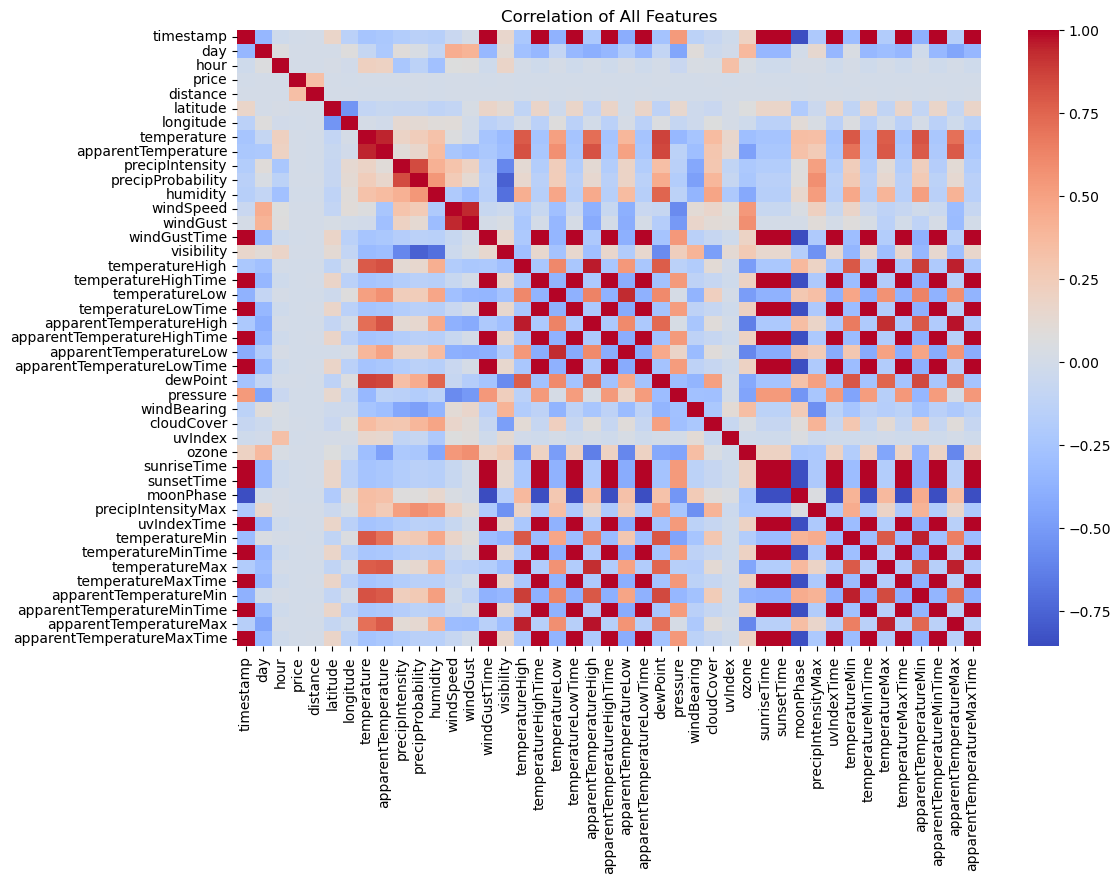

In [89]:
# initially lets start off by determining the correlation of all features
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, fmt=".2f", cmap='coolwarm')
plt.title("Correlation of All Features")
plt.show()

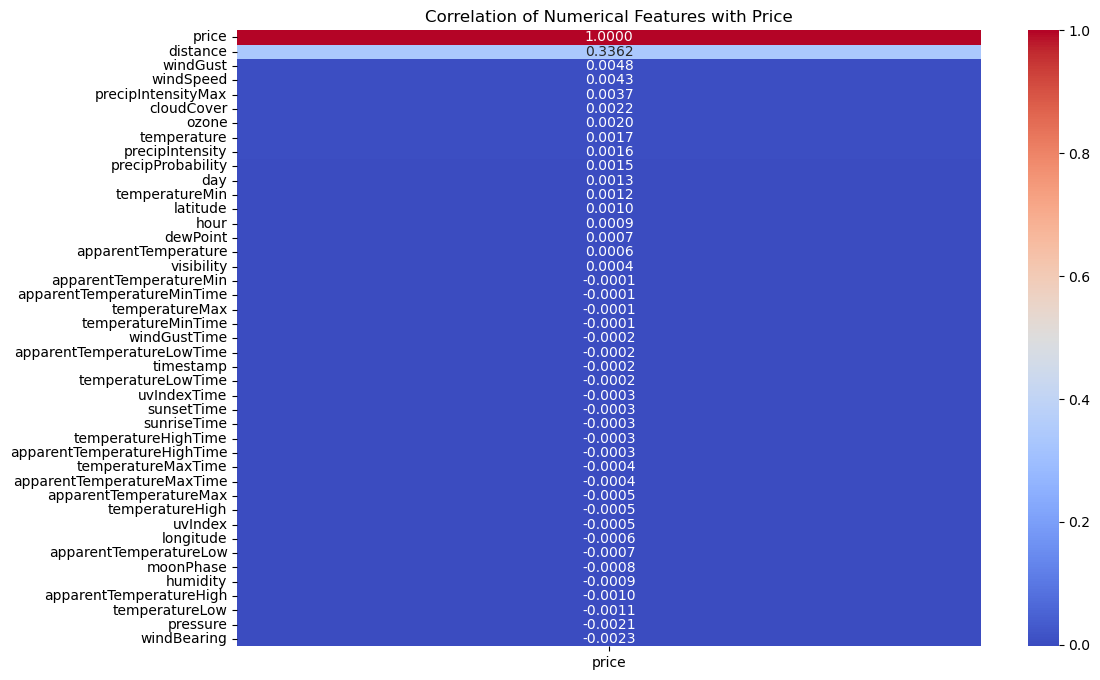

In [90]:
# then lets determine the correlation of price with numerical features
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
corr_with_price = corr_matrix[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_with_price, annot=True, fmt=".4f", cmap='coolwarm', cbar=True)
plt.title("Correlation of Numerical Features with Price")
plt.show()

Also, lets take a look at the relationship between price and categorical features

<Axes: xlabel='price', ylabel='name'>

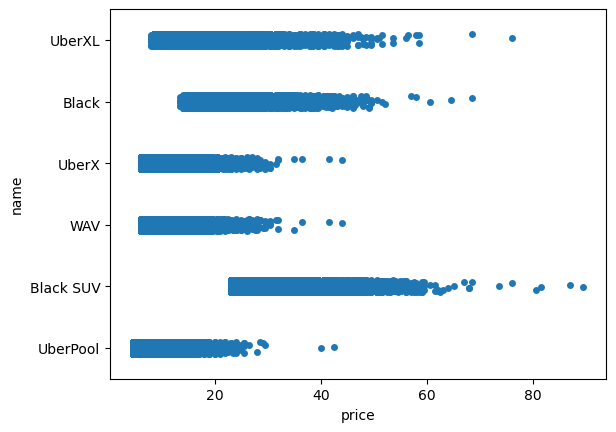

In [91]:
sns.stripplot(data=df, x='price', y='name')

<Axes: xlabel='price', ylabel='icon'>

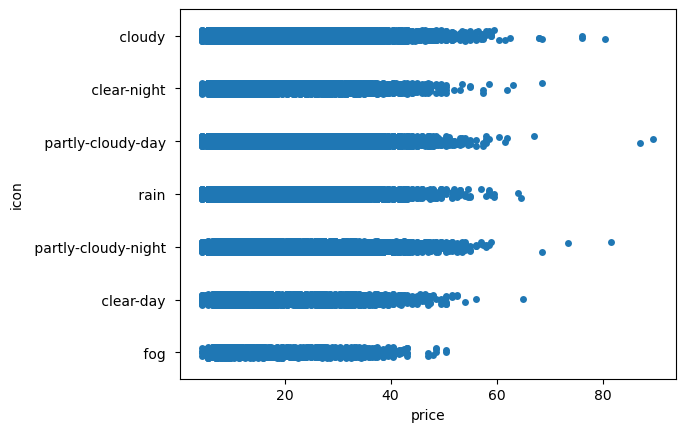

In [92]:
sns.stripplot(data=df, x='price', y='icon')

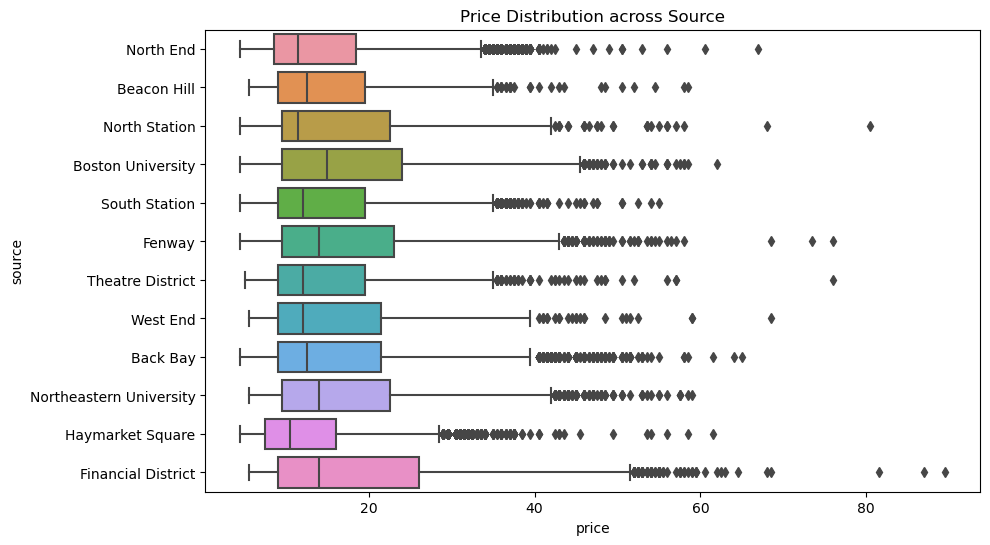

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price', y='source')
plt.title("Price Distribution across Source")
plt.show()

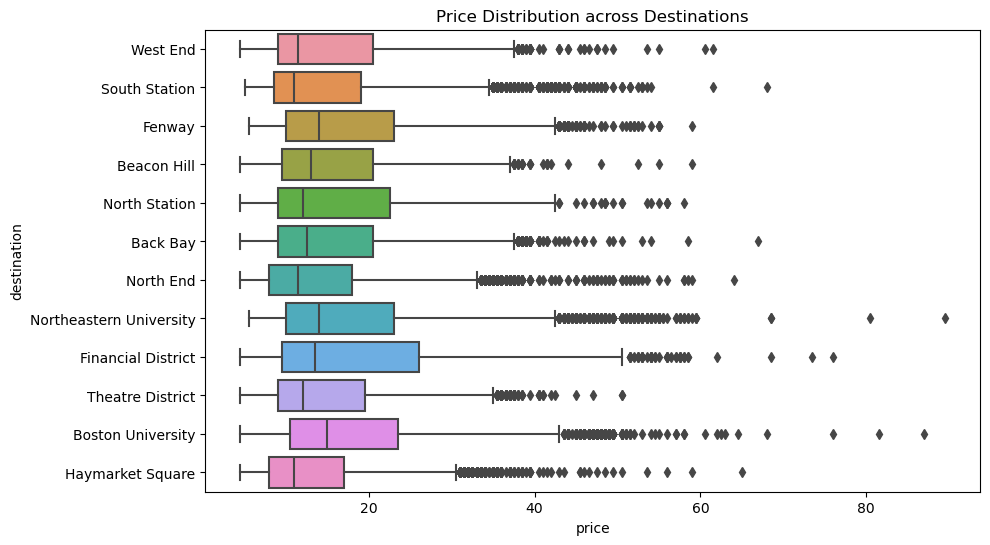

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price', y='destination')
plt.title("Price Distribution across Destinations")
plt.show()

### Label Encoding

In [163]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df.dtypes

id                              object
timestamp                      float64
day_of_week                     object
month                           object
day                              int64
time                            object
datetime                        object
hour                             int64
source                          object
destination                     object
product_id                      object
name                            object
price                          float64
distance                       float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                       float64
windGustTime             

In [164]:
columns = ['id', 'day_of_week', 'month', 'time', 'datetime', 'source',
           'destination', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']

columns_to_print = {'name', 'icon'}

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])
    
    if column in columns_to_print:
        print(f"Class mapping of {column}: ")
        for i, item in enumerate(label_encoder.classes_):
            print(f"{item} --> {i}")

Class mapping of name: 
Black --> 0
Black SUV --> 1
UberPool --> 2
UberX --> 3
UberXL --> 4
WAV --> 5
Class mapping of icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [165]:
# shows that object datatypes have been converted
df.head()

,id,timestamp,day_of_week,month,day,time,datetime,hour,source,destination,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,854,1.543616e+09,0,1,30,1189,8565,22,6,11,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,46471,1.544698e+09,4,0,13,562,17198,10,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,69269,1.544729e+09,4,0,13,1034,18045,19,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,104739,1.545005e+09,3,0,16,1279,25775,23,6,11,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,188337,1.544748e+09,0,0,14,35,18593,0,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [166]:
# check for any null values
df.isnull().sum()

id                             0
timestamp                      0
day_of_week                    0
month                          0
day                            0
time                           0
datetime                       0
hour                           0
source                         0
destination                    0
product_id                     0
name                           0
price                          0
distance                       0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

### Recursive Feature Elimination (RFE)

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.feature_selection import RFE

In [241]:
X = df.drop('price', axis = 1)
y = df['price']

In [242]:
X.head()

,id,timestamp,day_of_week,month,day,time,datetime,hour,source,destination,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,854,1.543616e+09,0,1,30,1189,8565,22,6,11,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,46471,1.544698e+09,4,0,13,562,17198,10,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,69269,1.544729e+09,4,0,13,1034,18045,19,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,104739,1.545005e+09,3,0,16,1279,25775,23,6,11,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,188337,1.544748e+09,0,0,14,35,18593,0,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [243]:
y.head()

0    12.0
1    16.0
2     7.5
3     7.5
4    26.0
Name: price, dtype: float64

In [244]:
X.shape

(330568, 54)

In [138]:
y.shape

(330568,)

#### Accuracy of all features

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [246]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(247926, 54) (82642, 54) (247926,) (82642,)


In [247]:
reg = LinearRegression()

reg = reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.4172977368561245

#### Accuracy of 30 features

In [248]:
rfe = RFE(estimator=reg, n_features_to_select=30, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.


In [249]:
rfe.support_

array([False, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
       False, False,  True,  True, False, False, False,  True,  True,
       False, False, False,  True, False,  True, False,  True, False])

In [250]:
XX = X[X.columns[rfe.support_]]

In [251]:
XX.head()

,day_of_week,month,day,source,product_id,name,distance,latitude,longitude,temperature,...,apparentTemperatureLow,icon,dewPoint,cloudCover,uvIndex,moonPhase,precipIntensityMax,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,0,1,30,6,3,4,1.11,42.3647,-71.0542,40.13,...,28.06,2,27.31,1.00,0,0.79,0.0003,42.52,26.41,40.53
1,4,0,13,6,1,0,1.11,42.3647,-71.0542,20.38,...,24.61,1,10.87,0.03,0,0.21,0.0001,33.83,13.79,32.85
2,4,0,13,6,0,3,1.11,42.3647,-71.0542,32.85,...,24.61,4,18.66,0.64,0,0.21,0.0001,33.83,13.79,32.85
3,3,0,16,6,5,5,1.11,42.3647,-71.0542,41.29,...,28.30,6,37.56,1.00,0,0.30,0.1252,43.83,33.98,38.38
4,0,0,14,6,2,1,1.11,42.3647,-71.0542,31.25,...,24.61,2,20.53,0.91,0,0.21,0.0001,33.83,13.79,32.85


In [252]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.25, random_state = 0)

In [253]:
X_train.shape

(247926, 30)

In [254]:
reg1 = LinearRegression()
reg1 = reg1.fit(X_train, y_train)
reg1.score(X_train, y_train)

0.41725738756707687

### Accuracy of 15 features

In [290]:
rfe = RFE(estimator=reg, n_features_to_select=15, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 fe

In [291]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False])

In [292]:
XX = X[X.columns[rfe.support_]]

In [293]:
XX.head()

,month,product_id,name,distance,latitude,longitude,precipIntensity,precipProbability,humidity,temperatureHigh,apparentTemperatureHigh,dewPoint,uvIndex,temperatureMax,apparentTemperatureMax
0,1,3,4,1.11,42.3647,-71.0542,0.0000,0.00,0.60,42.52,40.53,27.31,0,42.52,40.53
1,0,1,0,1.11,42.3647,-71.0542,0.0000,0.00,0.66,33.83,32.85,10.87,0,33.83,32.85
2,0,0,3,1.11,42.3647,-71.0542,0.0000,0.00,0.56,33.83,32.85,18.66,0,33.83,32.85
3,0,5,5,1.11,42.3647,-71.0542,0.0567,0.94,0.86,43.83,38.38,37.56,0,43.83,38.38
4,0,2,1,1.11,42.3647,-71.0542,0.0000,0.00,0.64,33.83,32.85,20.53,0,33.83,32.85


In [294]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.25, random_state = 0)

In [295]:
X_train.shape

(247926, 15)

In [296]:
reg2 = LinearRegression()
reg2 = reg2.fit(X_train, y_train)

In [297]:
reg2.score(X_train, y_train)

0.4171872115605827

### Accuracy of 5 features

In [263]:
rfe = RFE(estimator=reg, n_features_to_select=5, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 fe

In [264]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [265]:
XX = X[X.columns[rfe.support_]]

In [266]:
XX.head()

,product_id,name,distance,latitude,longitude
0,3,4,1.11,42.3647,-71.0542
1,1,0,1.11,42.3647,-71.0542
2,0,3,1.11,42.3647,-71.0542
3,5,5,1.11,42.3647,-71.0542
4,2,1,1.11,42.3647,-71.0542


In [267]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.25, random_state = 0)

In [268]:
X_train.shape

(247926, 5)

In [269]:
reg3 = LinearRegression()
reg3 = reg4.fit(X_train, y_train)

In [270]:
reg3.score(X_train, y_train)

0.4171349524642066

### Accuracy of 2 features

In [271]:
rfe = RFE(estimator=reg, n_features_to_select=2, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 fe

In [272]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [273]:
XX = X[X.columns[rfe.support_]]

In [274]:
XX.head()

,name,distance
0,4,1.11
1,0,1.11
2,3,1.11
3,5,1.11
4,1,1.11


In [281]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.25, random_state = 0)

In [282]:
X_train.shape

(247926, 2)

In [283]:
reg4 = LinearRegression()
reg4 = reg4.fit(X_train, y_train)

In [284]:
reg4.score(X_train, y_train)

0.41684067621310106

### After RFE

In [285]:
XX.columns

Index(['name', 'distance'], dtype='object')

In [286]:
XX.shape

(330568, 2)

In [287]:
XX.head()

,name,distance
0,4,1.11
1,0,1.11
2,3,1.11
3,5,1.11
4,1,1.11


### Drop Features

,id,timestamp,day_of_week,month,day,time,datetime,hour,source,destination,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,854,1.543616e+09,0,1,30,1189,8565,22,6,11,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,46471,1.544698e+09,4,0,13,562,17198,10,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,69269,1.544729e+09,4,0,13,1034,18045,19,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,104739,1.545005e+09,3,0,16,1279,25775,23,6,11,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,188337,1.544748e+09,0,0,14,35,18593,0,6,11,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


### Final Model

In [263]:
df.to_csv('./data_feature_engineering.csv', index=False)